In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv("/content/drive/MyDrive/MachineLearning/Data/HR_comma_sep.csv")

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [32]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [33]:
columns=df.columns

In [24]:
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

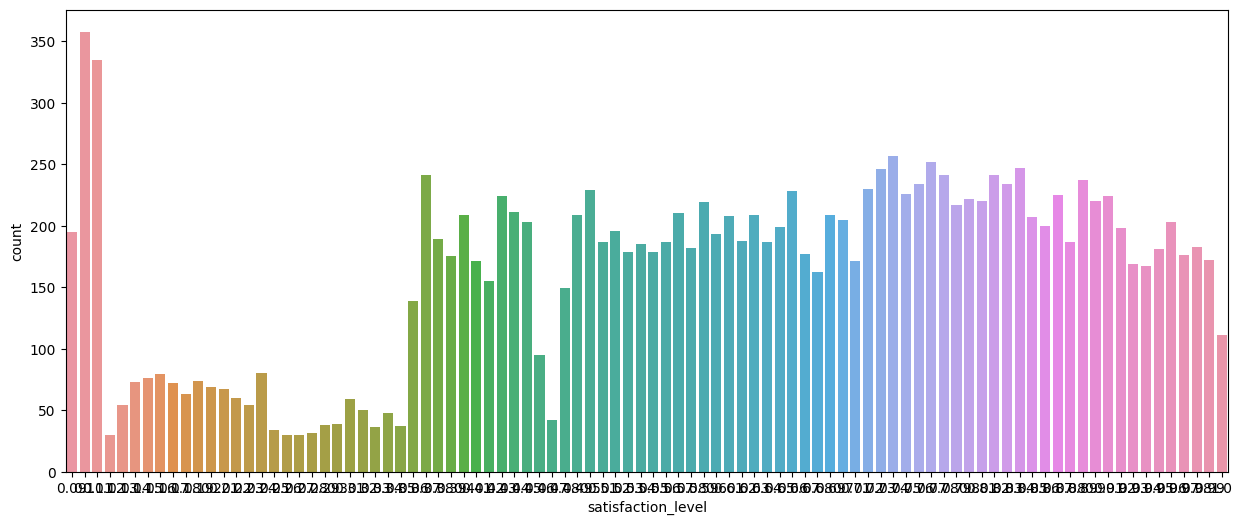

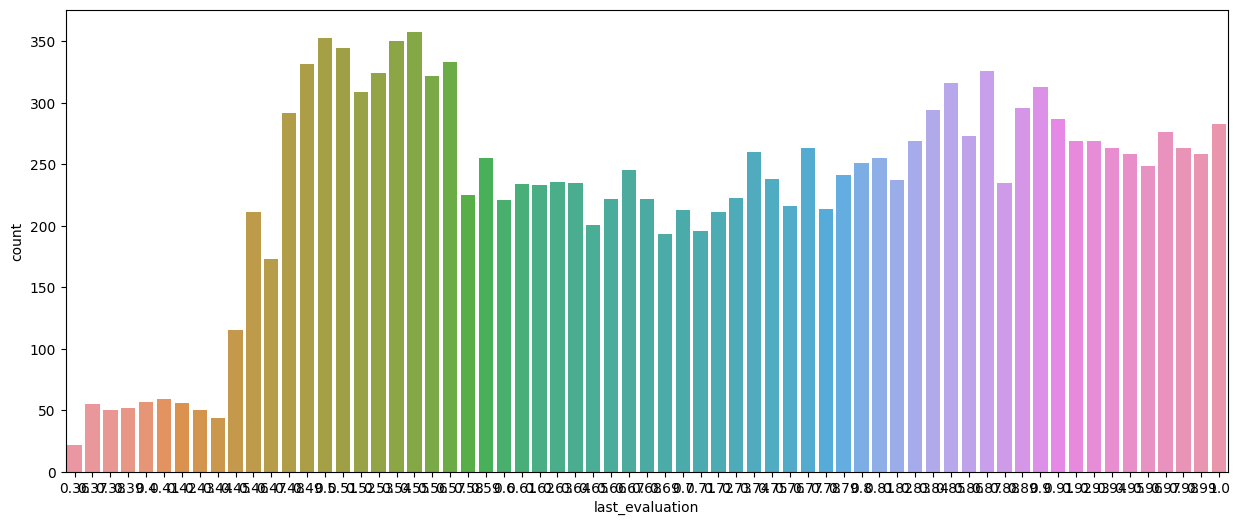

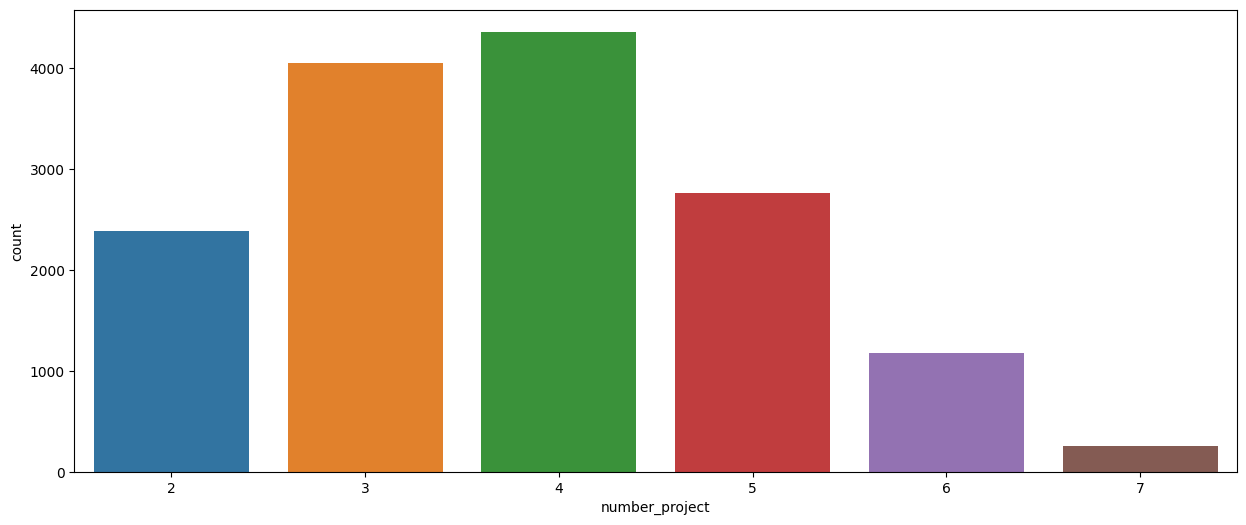

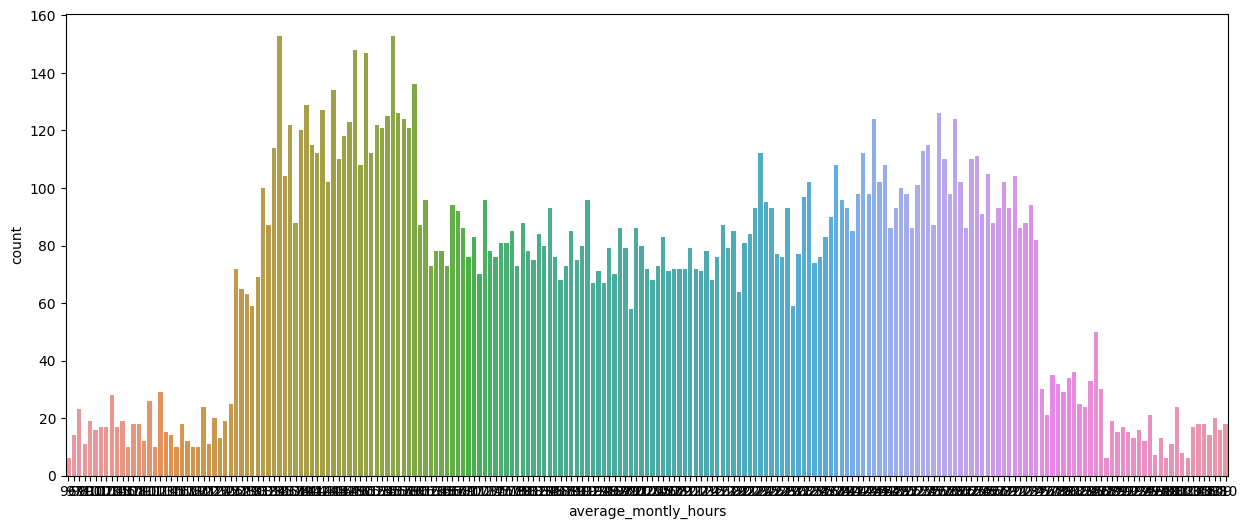

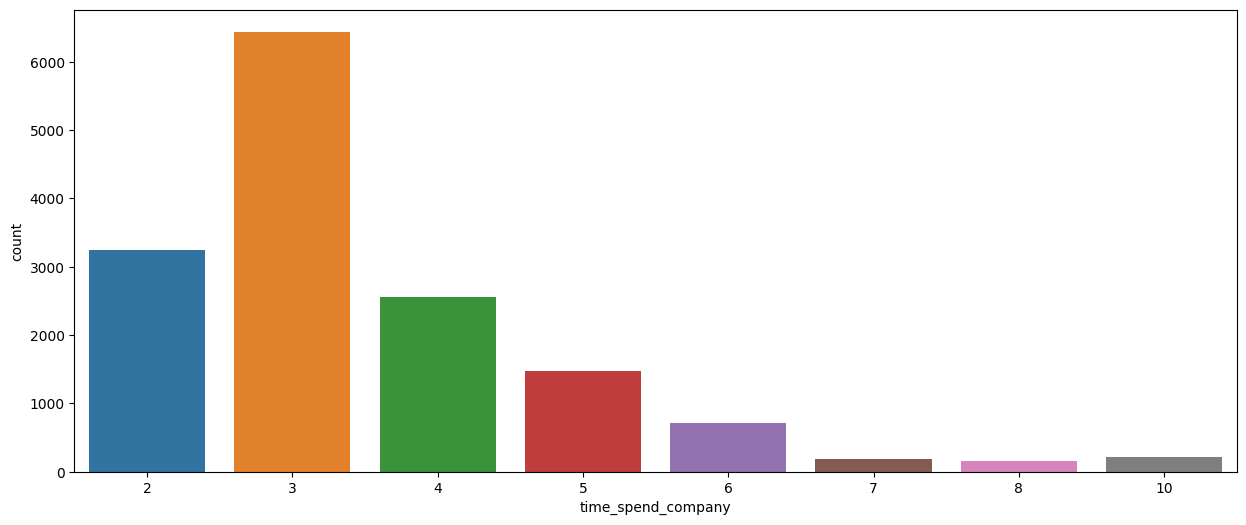

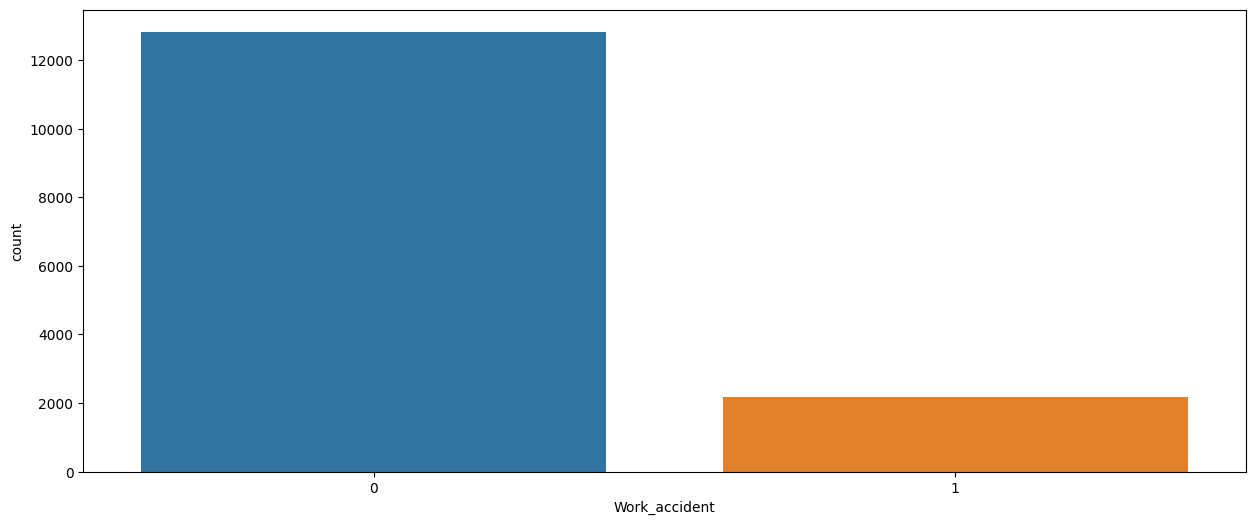

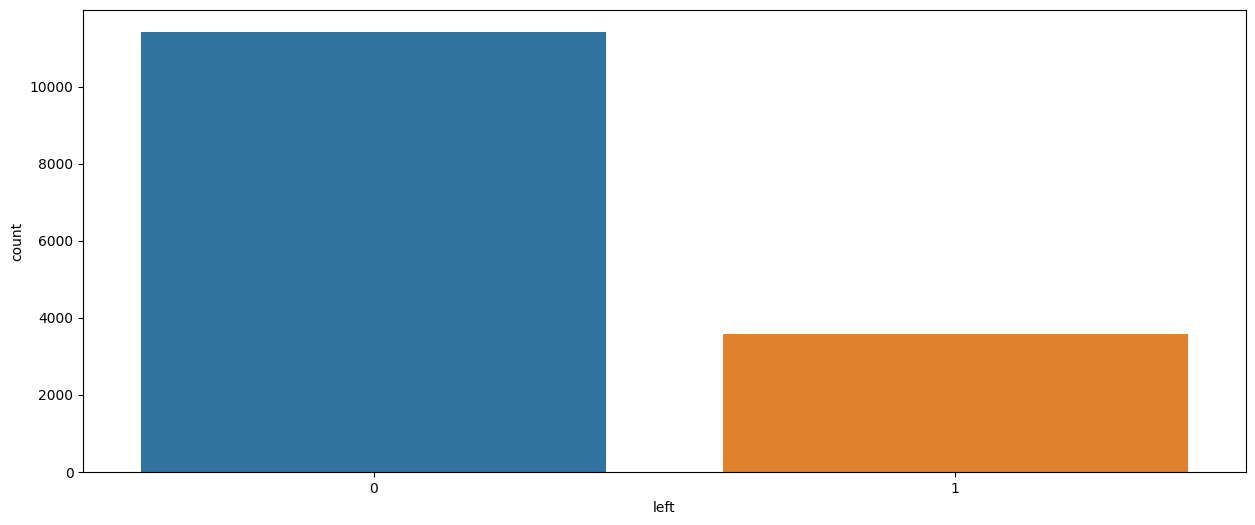

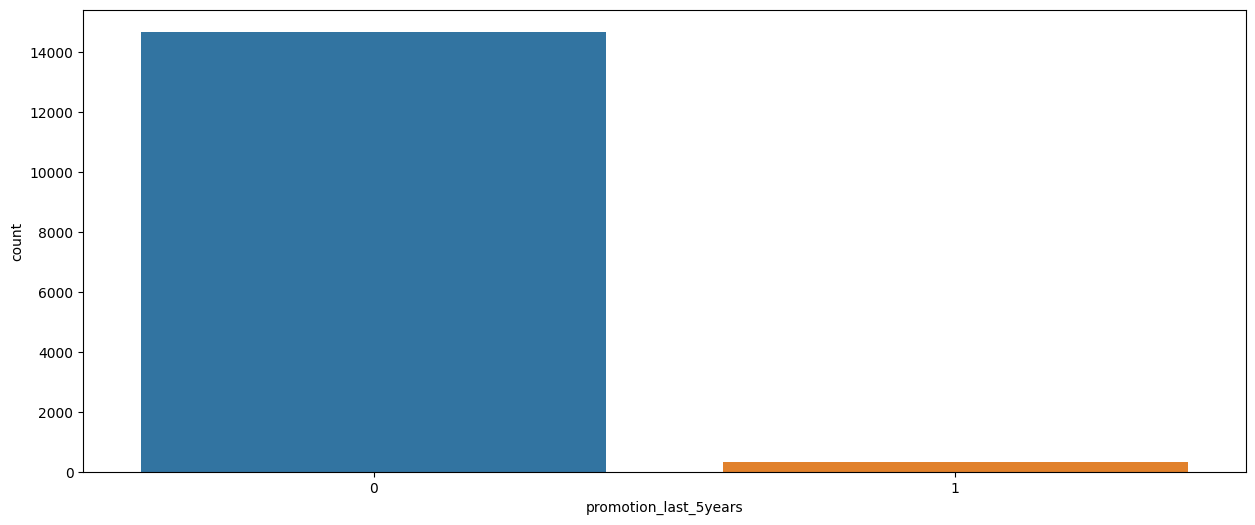

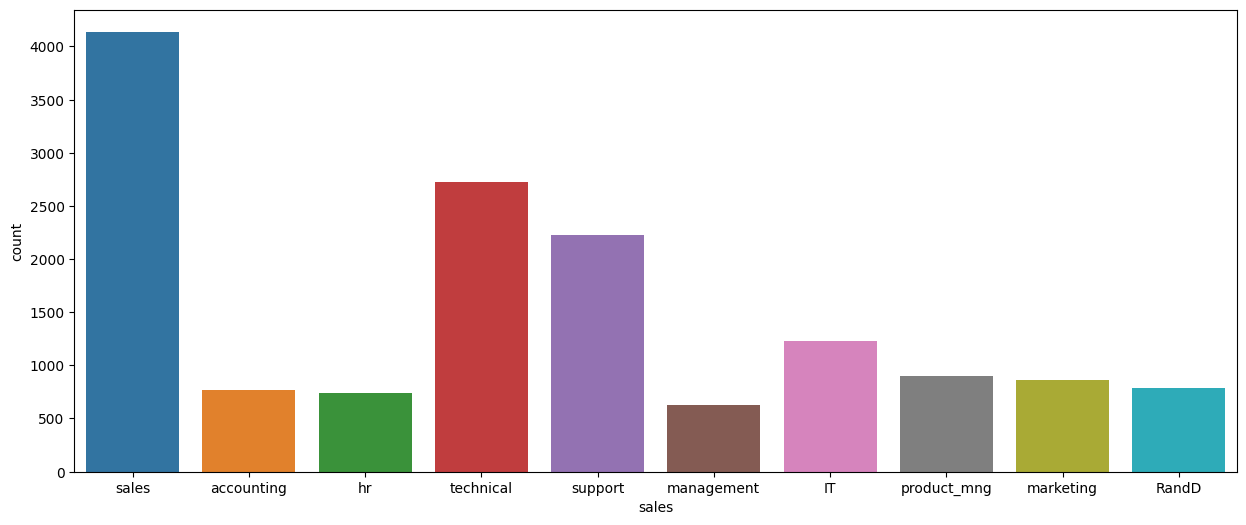

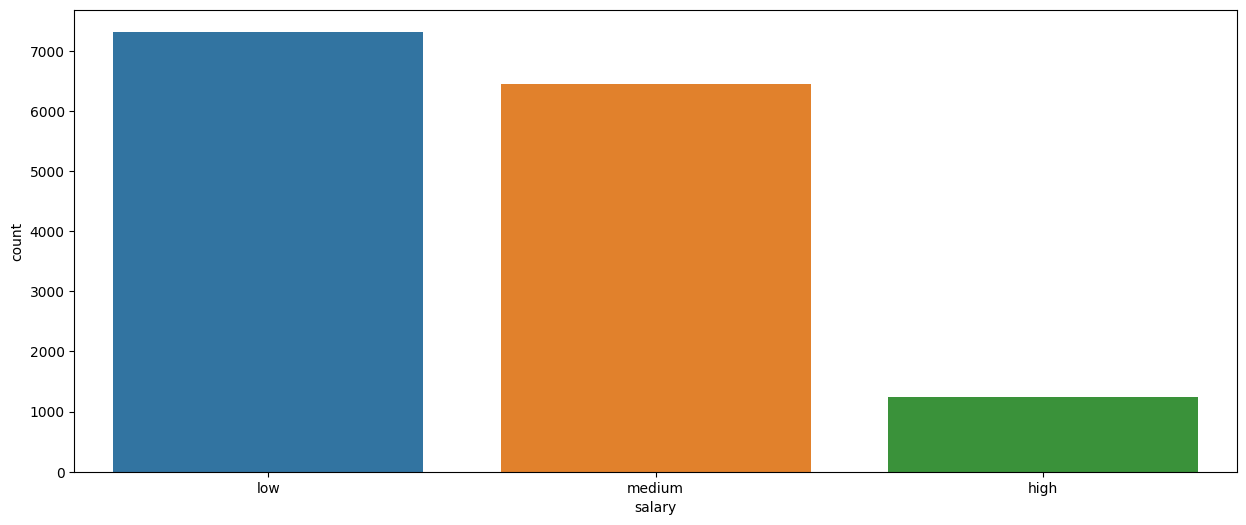

In [35]:
for i in columns:
  plt.figure(figsize=(15,6));
  sns.countplot(x=df[i], data=df);
  plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [38]:
df_categoric=df.select_dtypes(include=["object"]).copy()

In [39]:
df_categoric

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [40]:
df_columns=df_categoric.columns

In [41]:
df_columns

Index(['sales', 'salary'], dtype='object')

In [43]:
from sklearn.preprocessing import LabelEncoder
for i in df_columns:
  lbe=LabelEncoder()
  df[i]=lbe.fit_transform(df[i])

In [44]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


#Machine Learning





1.   Logistic Regression
2.   SVM
3.   KNN
4.   Decision Tree



In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [46]:
y=df["left"]
X=df.drop(["left"], axis=1)

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

##Logistic Regression

In [48]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_score=accuracy_score(y_test, y_pred)
print("model accuracy:", log_score)

model accuracy: 0.7584444444444445


Text(0.5, 1.0, 'Model Accuracy:0.7584444444444445')

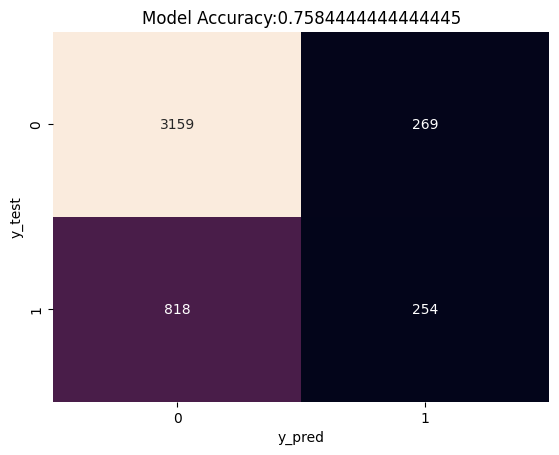

In [49]:
confusionmatrix_log=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix_log, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(log_score))

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



#SVM

model accuracy: SVC()
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3428
           1       1.00      0.10      0.18      1072

    accuracy                           0.78      4500
   macro avg       0.89      0.55      0.53      4500
weighted avg       0.83      0.78      0.71      4500



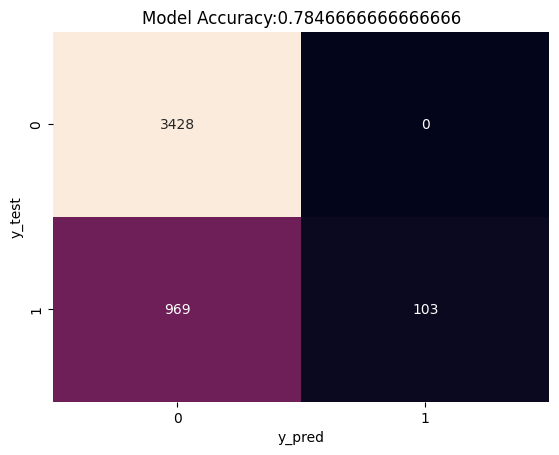

In [51]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
SVM_score=accuracy_score(y_test,y_pred)
print("model accuracy:", svm_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(SVM_score))
print(classification_report(y_test, y_pred))

##KNN

model accuracy: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3428
           1       0.81      0.90      0.86      1072

    accuracy                           0.93      4500
   macro avg       0.89      0.92      0.90      4500
weighted avg       0.93      0.93      0.93      4500



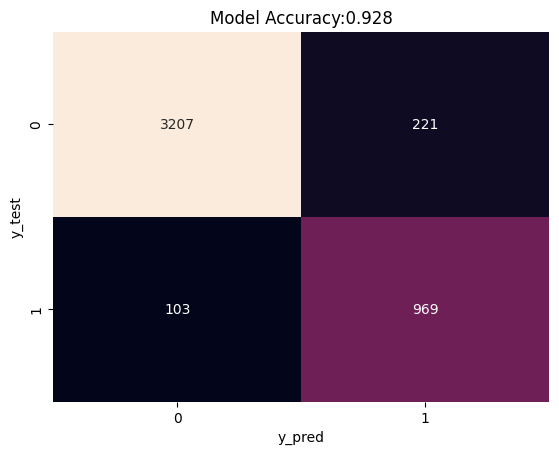

In [52]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred=knn_model.predict(X_test)
knn_score=accuracy_score(y_test,y_pred)
print("model accuracy:", knn_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(knn_score))
print(classification_report(y_test, y_pred))

#Decision Tree

model accuracy: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3428
           1       0.94      0.96      0.95      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.97      0.97      0.97      4500



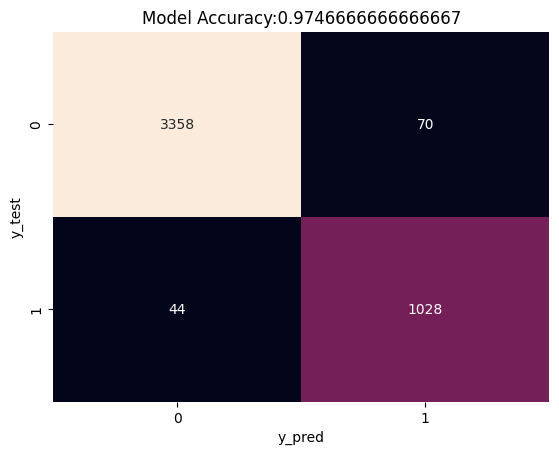

In [53]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
tree_score=accuracy_score(y_test,y_pred)
print("model accuracy:", tree_model)
confusionmatrix=confusion_matrix(y_test, y_pred)
sns.heatmap(confusionmatrix, annot=True, cbar=False, fmt="g")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Model Accuracy:"+str(tree_score))
print(classification_report(y_test, y_pred))

When we compare with this ML models, Decision Tree model is by far the best.